# **Système de détection d'intrusion (IDS**)
- Les systèmes de détection d’intrusion sont des outils ayant pour objectifs de **détecter des activités malicieuses** sur la cible qu'ils surveillent.
- Une alerte sera déclenchée dès lors qu’un comportement malicieux est détecté. - Les systèmes de détection d'intrusion sont utilisés en plus des solutions traditionnelles telles que les pare-feux, pour détecter différents types d'utilisation malicieuse de leur cible qui ne peuvent être détectée par ces dernières.
- Pour cela, de nombreux paramètres doivent être pris en compte selon ce que l’on cherche à surveiller.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt


In [5]:
train = pd.read_csv(r'E:\CYBERSENTINEL\ML\reste.csv', encoding='ISO-8859-1', index_col=0)

In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2281054 entries, 1 to 2540038
Data columns (total 37 columns):
 #   Column            Dtype  
---  ------            -----  
 0   srcip             object 
 1   sport             int64  
 2   dstip             object 
 3   dsport            int64  
 4   proto             object 
 5   state             object 
 6   dur               float64
 7   dbytes            int64  
 8   sttl              int64  
 9   dttl              int64  
 10  sloss             int64  
 11  service           object 
 12  sload             float64
 13  dload             float64
 14  spkts             int64  
 15  swin              int64  
 16  stcpb             int64  
 17  dtcpb             int64  
 18  smeansz           int64  
 19  dmeansz           int64  
 20  trans_depth       int64  
 21  res_bdy_len       int64  
 22  sjit              float64
 23  djit              float64
 24  stime             int64  
 25  ltime             int64  
 26  sintpkt           f

In [7]:
columns=['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state',
       'dur', 'dbytes', 'sttl', 'dttl', 'sloss', 'service', 'sload', 'dload',
       'spkts', 'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth',
       'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt',
       'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl',
       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src','label']
train.columns = columns

- Voici une brève description de chaque feature:
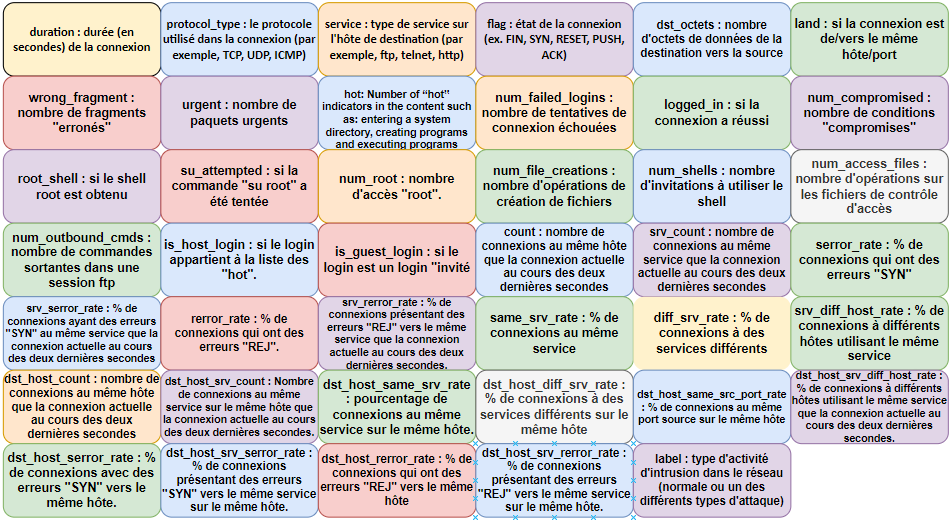

# **Encode categorical features**

- L'encodage est une étape importante dans le traitement des données, qui consiste à convertir les valeurs de caractéristiques catégorielles en nombres, afin que ces caractéristiques puissent être utilisées dans des modèles d'apprentissage automatique.

In [9]:
# Encode categorical features
categorical_features = ['proto', 'service', 'state']
for feature in categorical_features:
    ord_enc = OrdinalEncoder()
    train[feature] = ord_enc.fit_transform(train[[feature]])

- Le code utilise la classe "OrdinalEncoder" de la bibliothèque "sklearn.preprocessing" pour encoder chaque caractéristique catégorielle.
- La liste "categorical_features" contient les noms de toutes les caractéristiques catégorielles à encoder.

- Dans la boucle "for", l'objet "ord_enc" de la classe "OrdinalEncoder" est créé pour chaque caractéristique. La méthode "fit_transform" de l'objet "ord_enc" est ensuite utilisée pour encoder les valeurs de chaque caractéristique.
- Cette méthode ajuste un encodeur sur les données d'entrée, puis transforme les valeurs de cette caractéristique en un tableau d'entiers.

- Les valeurs encodées remplacent ensuite les valeurs d'origine de chaque caractéristique catégorielle dans l'ensemble de données "data".
- De cette façon, toutes les caractéristiques catégorielles de l'ensemble de données sont converties en nombres, ce qui permet à des modèles d'apprentissage automatique de les utiliser pour effectuer des prédictions.

# **Split the data into training and test sets**

In [10]:
X = train.drop('label', axis=1)
y = train['label']

- Les données sont divisées en deux parties : les caractéristiques d'entrée (ou "features") et les étiquettes de sortie (ou "labels").

- La première ligne crée un nouvel objet "X" en supprimant la colonne "label" de l'ensemble de données "data".
- Cela signifie que "X" contient toutes les caractéristiques d'entrée de l'ensemble de données, à l'exception de l'étiquette de sortie.

- La deuxième ligne crée un objet "y" qui contient seulement la colonne "label" de l'ensemble de données "data".
- Cela signifie que "y" contient les étiquettes de sortie (ou "labels") de l'ensemble de données.

- En divisant l'ensemble de données de cette manière, les caractéristiques d'entrée "X" et les étiquettes de sortie "y" peuvent être utilisées pour entraîner un modèle d'apprentissage automatique.
- La partie "test" de l'ensemble de données peut être utilisée pour évaluer la performance du modèle une fois qu'il a été entraîné sur l'ensemble d'apprentissage.

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- Ce code est utilisé pour diviser l'ensemble de données en un ensemble d'apprentissage (train) et un ensemble de test (test) en utilisant la fonction "train_test_split" de la bibliothèque "sklearn.model_selection".
- Cette division est importante pour évaluer la performance d'un modèle d'apprentissage automatique sur des données qu'il n'a jamais vues auparavant.

- La première ligne crée un objet "X_train" qui contient les caractéristiques d'entrée de l'ensemble de données "X", qui ont été divisées en un ensemble d'apprentissage.

- La deuxième ligne crée un objet "X_test" qui contient les caractéristiques d'entrée de l'ensemble de données "X", qui ont été divisées en un ensemble de test.

- La troisième ligne crée un objet "y_train" qui contient les étiquettes de sortie (ou "labels") de l'ensemble de données "y", qui ont été divisées en un ensemble d'apprentissage.

- La quatrième ligne crée un objet "y_test" qui contient les étiquettes de sortie (ou "labels") de l'ensemble de données "y", qui ont été divisées en un ensemble de test.

- La taille de l'ensemble de test est définie par le paramètre "test_size", qui est défini à 0,3 dans ce cas.
- Cela signifie que 30% des données sont réservées pour l'ensemble de test, tandis que les 70% restants sont utilisés pour l'ensemble d'apprentissage.
- Le paramètre "random_state" est utilisé pour initialiser le générateur de nombres aléatoires afin de s'assurer que la division est toujours la même, ce qui permet de reproduire les résultats.

# **Normaliser les caractéristiques en utilisant le scaler standard**

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Définir les préprocesseurs pour les caractéristiques numériques et catégorielles
num_preprocessor = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_preprocessor = make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), OneHotEncoder(handle_unknown='ignore'))

# Définir les listes de caractéristiques numériques et catégorielles
num_features = ['dur', 'dbytes', 'sttl', 'dttl', 'sloss', 'sload', 'dload', 'spkts', 'swin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit', 'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'synack', 'ackdat', 'is_sm_ips_ports', 'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src']
cat_features = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service']

# Créer le preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_preprocessor, num_features),
        ('cat', cat_preprocessor, cat_features)])

# Créer une instance de StandardScaler
scaler = make_pipeline(preprocessor, StandardScaler(with_mean=False))

# Entraîner le modèle
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

- La normalisation est une étape importante dans la préparation des données pour l'apprentissage automatique, car elle permet de mettre toutes les caractéristiques à la même échelle, ce qui peut aider à améliorer la performance des modèles.

- La première ligne crée un nouvel objet "scaler" qui contient une instance de la classe "StandardScaler". Cette classe est utilisée pour standardiser les caractéristiques en les centrant autour de 0 et en les redimensionnant en fonction de leur écart type.

- La deuxième ligne utilise l'objet "scaler" pour standardiser les caractéristiques d'entrée de l'ensemble d'apprentissage "X_train" en utilisant la méthode "fit_transform". Cela signifie que l'objet "scaler" calcule la moyenne et l'écart type de chaque caractéristique de l'ensemble d'apprentissage, puis les utilise pour standardiser les caractéristiques. Les caractéristiques standardisées sont ensuite stockées dans un nouvel objet "X_train".

- La troisième ligne utilise l'objet "scaler" pour standardiser les caractéristiques d'entrée de l'ensemble de test "X_test" en utilisant la méthode "transform". Cela signifie que l'objet "scaler" utilise les moyennes et les écarts types calculés précédemment pour standardiser les caractéristiques de l'ensemble de test. Les caractéristiques standardisées sont ensuite stockées dans un nouvel objet "X_test".

- En normalisant les caractéristiques de cette manière, elles sont mises à la même échelle et peuvent être utilisées pour entraîner des modèles d'apprentissage automatique plus performants.

# **Entraînement d'un classificateur KNN sur l'ensemble d'entraînement**

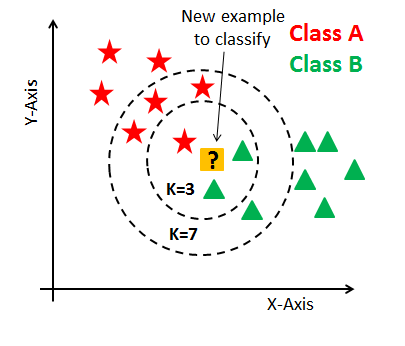

In [13]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

- On entraîne un classificateur KNN (K-Nearest Neighbors) sur l'ensemble de données d'apprentissage normalisé, en utilisant la bibliothèque "sklearn.neighbors".

- La première ligne crée un objet KNeighborsClassifier avec l'argument "n_neighbors=5", ce qui signifie que le modèle va considérer les 5 voisins les plus proches pour chaque point.

- La deuxième ligne utilise la méthode "fit" pour entraîner le modèle en utilisant les caractéristiques normalisées d'entrée "X_train" et les étiquettes correspondantes de sortie "y_train". Cela permet au modèle d'apprendre à prédire les étiquettes de sortie pour de nouvelles entrées.

- Une fois le modèle entraîné, il peut être utilisé pour prédire les étiquettes de sortie pour de nouvelles entrées en utilisant la méthode "predict".

**Prédire les labels cibles pour l'ensemble de test**

In [14]:
y_pred = knn.predict(X_test)

KNN (k-Nearest Neighbors) : C'est un algorithme de classification basé sur la distance. Il pourrait être utile, mais il peut ne pas être le plus efficace en termes de temps de calcul avec de grands ensembles de données.

# **Évaluer la performance du classificateur**

In [ ]:
# Evaluate the performance of the classifier
accuracy3 = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy3 * 100))

Accuracy: 99.38%


**Matrice de Confusion**

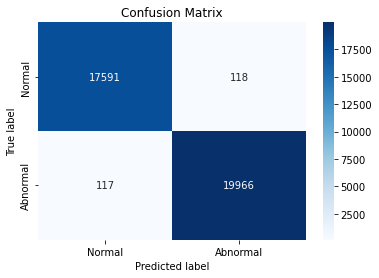

In [ ]:
import seaborn as sns
cm3 = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', xticklabels=['Normal', 'Abnormal'], yticklabels=['Normal', 'Abnormal'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     anomaly       0.99      0.99      0.99     17709
      normal       0.99      0.99      0.99     20083

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



# **Enregistrer le modèle :**

In [ ]:
import joblib
# Save the trained model to a file
joblib.dump(knn, 'knn_model.joblib')

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'Accuracy': '{:.2%}',
                                                                     'Precision': '{:.2%}',
                                                                     'Recall': '{:.2%}',
                                                                     'F1-Score': '{:.2%}',
                                                                     'time to train':'{:.1f}',
                                                                     'time to predict':'{:.1f}',
                                                                     'total time':'{:.1f}',
                                                                     })